# WeatherPy: OpenWeatherAPI Data

---

## Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("    Beginning Data Retrieval     ")
print("---------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city.replace(" ", "%20")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is encountered, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Pause pull to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------------")
print("      Data Retrieval Complete      ")
print("-----------------------------------")

    Beginning Data Retrieval     
---------------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | atafu village
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | constantia
Processing Record 5 of Set 1 | mount pearl
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | berbera
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | iskateley
Processing Record 13 of Set 1 | utrik
Processing Record 14 of Set 1 | oakdale
Processing Record 15 of Set 1 | tierp
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | berezovyy
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | guerrero negro
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | nar'yan-mar
Processing Record 22 of Set 1 | hwange
Processing Record 2

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,-22.70,98,83,0.46,GL,1741200360
1,atafu village,-8.5421,-172.5159,27.86,70,100,4.09,TK,1741200362
2,adamstown,-25.0660,-130.1015,25.65,75,92,5.47,PN,1741200363
3,constantia,44.1833,28.6500,5.38,63,48,3.18,RO,1741200088
4,mount pearl,47.5166,-52.7813,2.30,83,75,8.75,CA,1741200283


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-22.70,98,83,0.46,GL,1741200360
1,atafu village,-8.5421,-172.5159,27.86,70,100,4.09,TK,1741200362
2,adamstown,-25.0660,-130.1015,25.65,75,92,5.47,PN,1741200363
3,constantia,44.1833,28.6500,5.38,63,48,3.18,RO,1741200088
4,mount pearl,47.5166,-52.7813,2.30,83,75,8.75,CA,1741200283


### Generate the Scatter Plots

#### Latitude Vs. Temperature

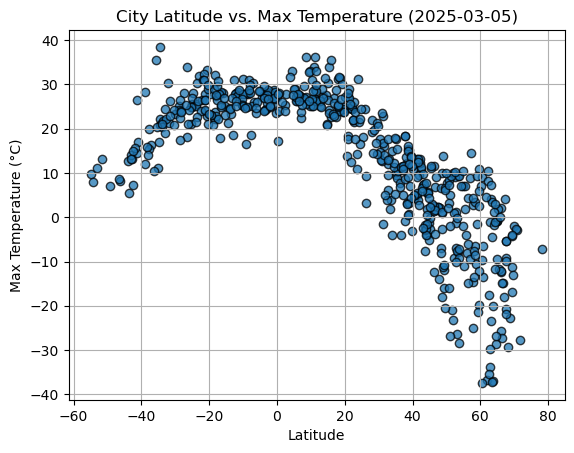

In [23]:
# Build scatter plot for latitude vs. Temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2025-03-05)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Max Temperature.png")

# Display plot
plt.show()

#### Latitude Vs. Humidity

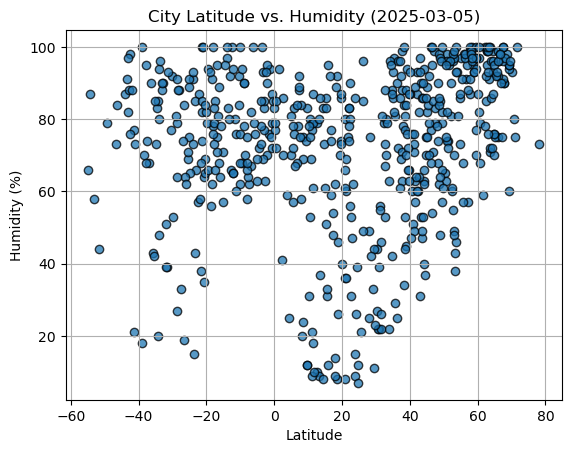

In [25]:
# Build the scatter plots for latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2025-03-05)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

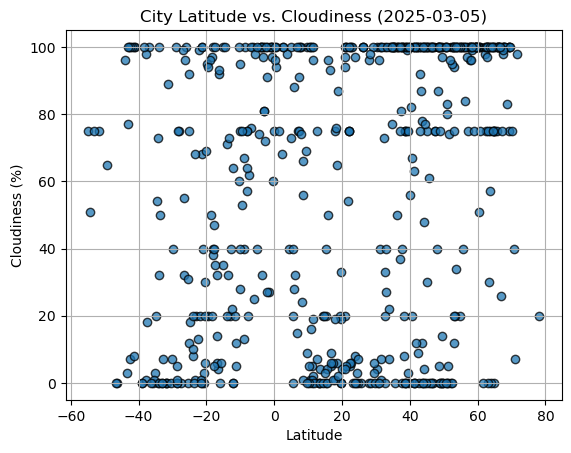

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2025-03-05)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

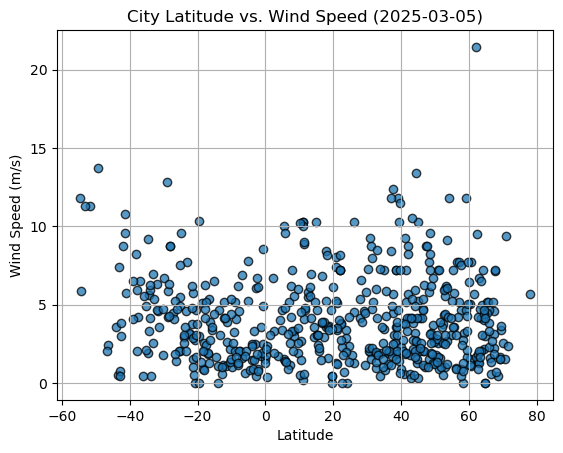

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2025-03-05)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Wind Speed.png")

# Display plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, save_path):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r", label=f"y = {slope:.2f}x + {intercept:.2f}")
    
    # Annotate r² value
    plt.annotate(f"r² = {rvalue**2:.3f}", (x_values.min(), y_values.max()), fontsize=12, color="red")

    # Add labels and title
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    
    # Save figure
    plt.savefig(save_path)
    
    # Show plot
    plt.show()

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-22.70,98,83,0.46,GL,1741200360
3,constantia,44.1833,28.6500,5.38,63,48,3.18,RO,1741200088
4,mount pearl,47.5166,-52.7813,2.30,83,75,8.75,CA,1741200283
5,qaqortoq,60.7167,-46.0333,-13.55,68,100,1.07,GL,1741200366
7,kodiak,57.7900,-152.4072,2.73,87,100,4.63,US,1741200369


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atafu village,-8.5421,-172.5159,27.86,70,100,4.09,TK,1741200362
2,adamstown,-25.0660,-130.1015,25.65,75,92,5.47,PN,1741200363
6,invercargill,-46.4000,168.3500,8.26,84,0,2.44,NZ,1741200367
8,port-aux-francais,-49.3500,70.2167,7.00,79,65,13.75,TF,1741200370
10,bredasdorp,-34.5322,20.0403,20.85,83,54,1.94,ZA,1741200372


###  Temperature vs. Latitude Linear Regression Plot

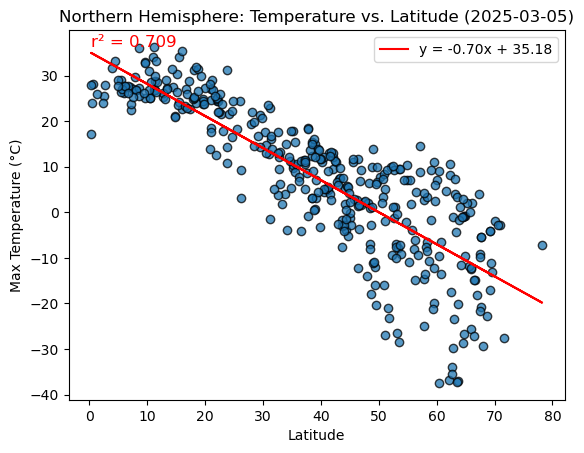

In [39]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
    "Northern Hemisphere: Temperature vs. Latitude (2025-03-05)", 
    "Latitude", "Max Temperature (°C)", 
    "output_data/NH Temperature vs. Latitude.png"
)

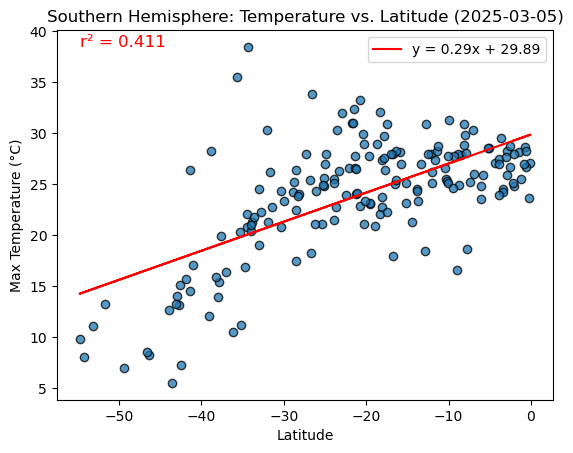

In [41]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
    "Southern Hemisphere: Temperature vs. Latitude (2025-03-05)", 
    "Latitude", "Max Temperature (°C)", 
    "output_data/SH Temperature vs. Latitude.png"
)

**Discussion of the linear relationships:**

*Northern Hemisphere:*
- The regression plot shows a strong negative correlation between temperature and latitude.
- The r<sup>2</sup> value of **0.709** supports this observation.
- Meaning as one moves away from the equator (increase in latitude), one can expect a decrease in the maximum temperature.
- These observations support what was expected from known climate regions on the globe.

*Southern Hemisphere:*
- The regression plot shows a positive correlation between temperature and latitude.
- The r<sup>2</sup> value of **0.411** supports this observation.
- Meaning as one moves away from the equator (increase in latitude), one can expect an increase in maximum temperature.
- This supports our expected results, as the Southern Hemisphere follows the same trends as the Northern Hemisphere but in reverse.

### Humidity vs. Latitude Linear Regression Plot

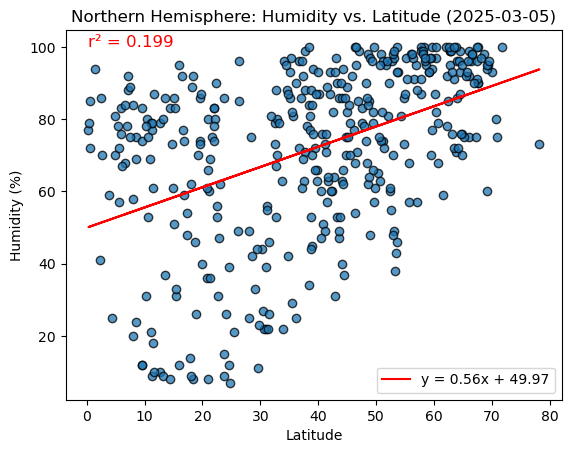

In [43]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
    "Northern Hemisphere: Humidity vs. Latitude (2025-03-05)", 
    "Latitude", "Humidity (%)", 
    "output_data/NH Humidity vs. Latitude.png"
)

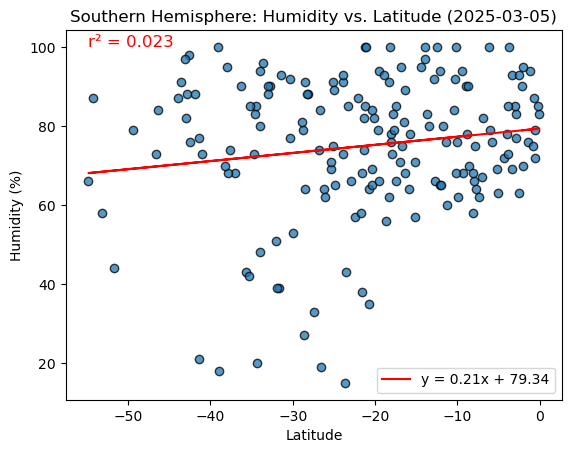

In [45]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
    "Southern Hemisphere: Humidity vs. Latitude (2025-03-05)", 
    "Latitude", "Humidity (%)", 
    "output_data/SH Humidity vs. Latitude.png"
)

**Discussion of the linear relationships:**

*Northern Hemisphere:*
- The regression plot shows a possible weak correlation between humidity and latitude.
- The r<sup>2</sup> value of **0.199** suggests that latitude alone is not a strong predictor of humidity.
- While some cities near the equator tend to have high humidity, the data does not show a consistent trend.
- Many factors influence humidity, including local geography, local biomes, and seasonal variations.

*Southern Hemisphere:*
- The regression plot shows an even weaker correlation between humidity and latitude than the Northern Hemisphere.
- The r<sup>2</sup> value of **0.023** suggests that other factors play a significant role in determining humidity.
- Although some equatorial regions tend to have higher humidity, the relationship is not strictly linear.

### Cloudiness vs. Latitude Linear Regression Plot

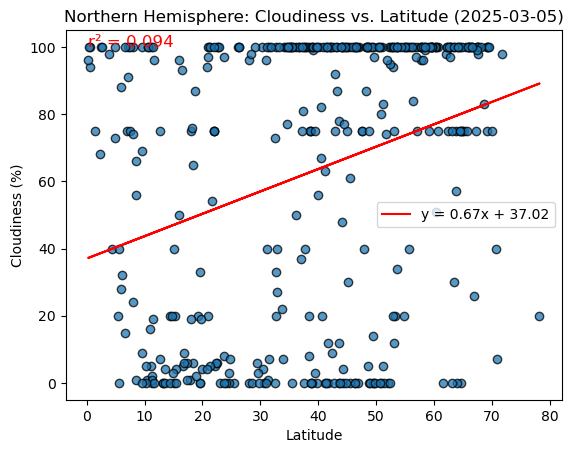

In [47]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
    "Northern Hemisphere: Cloudiness vs. Latitude (2025-03-05)", 
    "Latitude", "Cloudiness (%)", 
    "output_data/NH Cloudiness vs. Latitude.png"
)

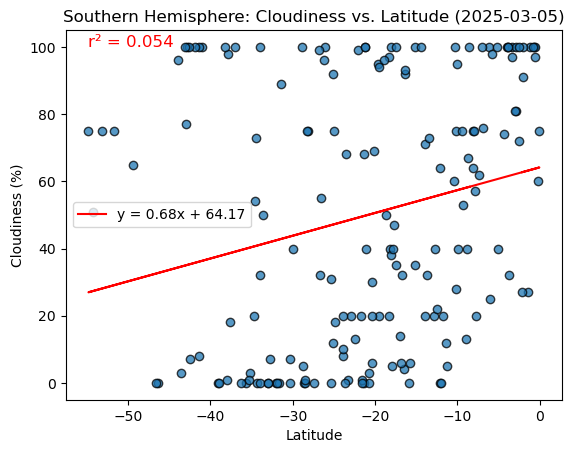

In [49]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
    "Southern Hemisphere: Cloudiness vs. Latitude (2025-03-05)", 
    "Latitude", "Cloudiness (%)", 
    "output_data/SH Cloudiness vs. Latitude.png"
)

**Discussion of the linear relationships:**

*Northern Hemisphere:*
- The regression plot shows a very weak correlation between cloudiness and latitude.
- The r<sup>2</sup> value of **0.709** suggests that latitude is not a good predictor of cloudiness.
- The data suggests cloudiness is influenced by regional weather systems, ocean currents, and air pressure rather than latitude alone.

*Southern Hemisphere:*
- The regression plot shows almost no correlation between cloudiness and latitude.
- The r<sup>2</sup> value of **0.054** all but confirms the observed weak relationship.
- The scatter plot likely exhibits significant variation, reinforcing that cloud cover is dependent on multiple meteorological factors independent of latitude.

### Wind Speed vs. Latitude Linear Regression Plot

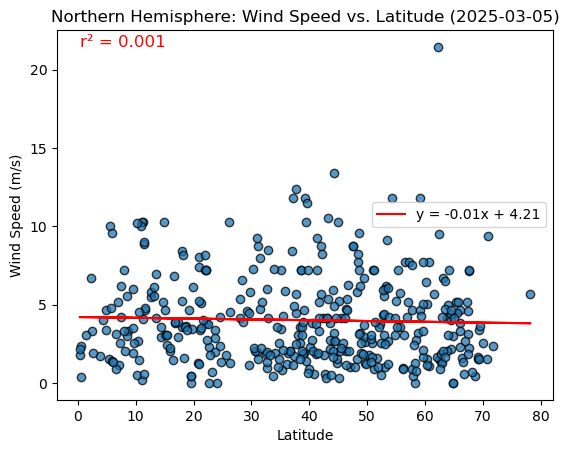

In [51]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
    "Northern Hemisphere: Wind Speed vs. Latitude (2025-03-05)", 
    "Latitude", "Wind Speed (m/s)", 
    "output_data/NH Wind Speed vs. Latitude.png"
)

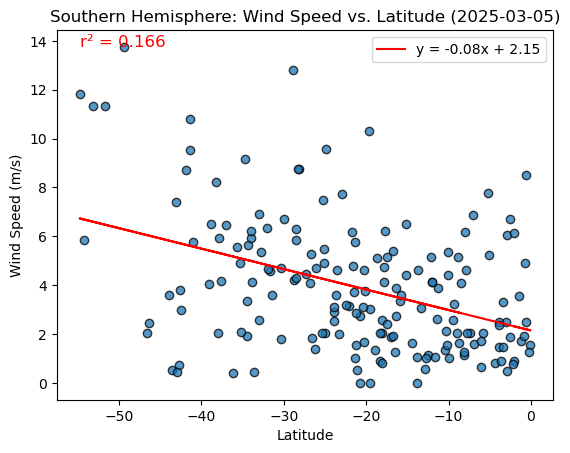

In [53]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
    "Southern Hemisphere: Wind Speed vs. Latitude (2025-03-05)", 
    "Latitude", "Wind Speed (m/s)", 
    "output_data/SH Wind Speed vs. Latitude.png"
)

**Discussion of the linear relationships:**

*Northern Hemisphere:*
- The regression plot shows a possible weak positive correlation between wind speed and latitude.
- The r<sup>2</sup> value of **0.001** indicates that latitude plays some role but is not the sole determinant of wind speed.
- Wind speed is influenced by local topography and weather conditions, more so than geospacial location.
- Higher latitudes might experience stronger winds due to polar jet streams and temperature differentials.

*Southern Hemisphere:*
- The regression plot shows there might be a weak negative correlation between wind speed and latitude.
- The r<sup>2</sup> value of **0.166** supports the observation that latitude alone does not predict wind speed.
- It is well documented that the Southern Hemisphere experiences strong winds in the -40° to -50° southern latitudes, which may have skewed the data.
- Due to variations in oceanic and atmospheric conditions, the correlation is not very strong.